# Objectives

Some problems involve rearranging a fixed set of objects. Any such problems go here. We include random search as a b

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
from math import hypot
from tqdm import tqdm

## Random Search

In [2]:
class RandomSearch:
    def __init__(
        self,
        N
    ):
        self.N = N
        
    def generateRandomHypothesis(self):
        output = [c for c in range(self.N)]
        r.shuffle(output)
        return(output)
    
    def optimize(self,
                objectiveFunction,
                numIterations = 25000):
        bestX = None
        bestY = -float("inf")
        for i in range(numIterations):
            newX = self.generateRandomHypothesis()
            newY = objectiveFunction(newX)
            if newY > bestY:
                bestX = newX
                bestY = newY
        return(bestX)

## Asexual Genertic Algorithm (Ordering)

A lot of ordering problems have very poor big-O, meaning that random search is unlikely to perform well for large N. The asexual genertic algorithm is a very simple algorithm that lets us achieve more rapid improvement for less compute for many kinds of problems.

In [3]:
class AsexualGeneticAlgorithm:
    def __init__(
        self,
        N,
        objectiveFunction,
        populationSize = 25,
        mutationMax = 4
    ):
        self.N = N
        self.populationSize = populationSize
        self.objectiveFunction = objectiveFunction
        self.mutationMax = mutationMax
        
    def generateRandomHypothesis(self):
        output = [c for c in range(self.N)]
        r.shuffle(output)
        return(output)

    def generateInitialPopulation(self):
        genome = [self.generateRandomHypothesis() for c in range(self.populationSize)]
        return([[genes, self.objectiveFunction(genes)] for genes in genome])

    def mutateOnce(self, genes):
        i = r.randint(0, len(genes) - 1)
        j = r.randint(0, len(genes) - 1)
        while i == j:
            j = r.randint(0, len(genes) - 1)
        geneI = genes[i]
        geneJ = genes[j]
        output = genes
        output[i] = geneJ
        output[j] = geneI
        return(output)

    def mutateFully(self, genes):
        output = [gene for gene in genes]
        for i in range(r.randint(1, self.mutationMax)):
            output = self.mutateOnce(output)
        return([output, self.objectiveFunction(output)])
    
    def optimize(self, numIterations = 2500):
        population = self.generateInitialPopulation()
        bestX = None
        bestY = -float("inf")
        for individual in population:
            if individual[1] > bestY:
                bestY = individual[1]
                bestX = individual[0]
        for i in tqdm(range(numIterations)):
            reproducingIndividual = r.choice(population)
            newIndividual = self.mutateFully(reproducingIndividual[0])
            stoppingCondition = False
            j = 0
            while not stoppingCondition:
                if population[j][1] < newIndividual[1]:
                    population[j] = newIndividual
                    stoppingCondition = True
                    if newIndividual[1] > bestY:
                        bestY = newIndividual[1]
                        bestX = newIndividual[0]
                else:
                    j += 1
                    if j == len(population):
                        stoppingCondition = True
        return(bestX)

## Travelling Salesman

A classic of optimization, the challenge is this: we have N towns in (-R, R), and must travel to all of the towns starting from any town we choose, and return to our starting town. What is the most efficient order to travel through all the towns such that we minimize our total distance travelled?

Town: 0 [4.773802447251736, 8.8796353149625]
Town: 1 [6.979783505571742, 5.6601507060883005]
Town: 2 [5.494373595931757, -7.567115249873144]
Town: 3 [-0.09461278678247709, 3.5950627866892404]
Town: 4 [7.039131682335334, -7.387587506890645]
Town: 5 [2.3976954055981423, 9.918538827967378]
Town: 6 [-9.69984041101322, -8.311485884270285]
Town: 7 [-3.4499312935580324, -6.276027863857935]
Town: 8 [-1.7771757730286915, 4.209449368145661]
Town: 9 [3.37298703580168, 7.480563948142361]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 52805.04it/s]

Path: [7, 6, 8, 3, 9, 0, 5, 1, 4, 2] Total Distance Travelled: 62.85752200825109


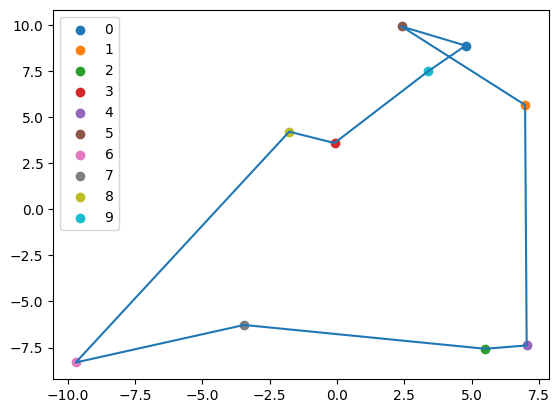

In [4]:
N = 10
R = 10

def travellingSalesmanSetup(N):
    return([[r.uniform(-R, R), r.uniform(-R, R)] for c in range(N)])

towns = travellingSalesmanSetup(N)
for i in range(N):
    print("Town:", str(i), towns[i])
import matplotlib.pyplot as plt
for i in range(len(towns)):
    town = towns[i]
    plt.scatter(town[0], town[1], label = i)
plt.legend()

def salesmanReward(x):
    d = 0
    for i in range(len(x)):
        a = towns[x[i]]
        b = towns[x[(i + 1) % len(x)]]
        d += hypot(b[0] - a[0], b[1] - a[1])
    return(-d)

asg = AsexualGeneticAlgorithm(N, salesmanReward, mutationMax = 2)
path = asg.optimize(numIterations = 10 ** 3)
print("Path:", path, "Total Distance Travelled:", -salesmanReward(path))
xs = [towns[i][0] for i in path] + [towns[path[0]][0]]
ys = [towns[i][1] for i in path] + [towns[path[0]][1]]
plt.plot(xs, ys)
plt.show()

## Dinner Table Problem

Suppose you have N coworkers and a matrix where the ijth element tells you how much person i likes person j. Then, we must seat all these people around a circular table. So the utility of the ordering is the sum of the matrix values for adjacent people.

In [5]:
N = 15
friendshipMatrix = np.random.randint(-10, 11, size = (N, N))
print(friendshipMatrix)

def seatingValue(x):
    output = friendshipMatrix[x[0]][x[-1]] + friendshipMatrix[x[-1]][x[0]]
    output += sum(friendshipMatrix[x[i]][x[i + 1]] + friendshipMatrix[x[i + 1]][x[i]] for i in range(len(x) - 1))
    return(output)

asg = AsexualGeneticAlgorithm(N, seatingValue, mutationMax = 2)

rs = RandomSearch(N)
arrangement = asg.optimize(numIterations = 10 ** 3)
print("Chosen arrangement:", arrangement)
print("Average friendliness in arrangement", seatingValue(arrangement) / N)

[[  4  -2   1   2   9   1  -6   7   8   7 -10  -4   2 -10   8]
 [ -3  -8   8   1   2   1  -4   7   5   5   9   4   8  -7   5]
 [ -3   1  -6  -6   6   6  -4   9  10 -10   0  -1   9  -4   3]
 [ -1   7  -3  -8   1  -1  -9   3   9   8  -5  -5  -4   5  -6]
 [ -5 -10  -9   3   6  -6  -4  -1   7   1   8   2   3   3  -4]
 [ -8  -4  -5 -10   2  -1   8  -1  -4   2   4   7   8 -10  -1]
 [  9  -1   4   6   5   9   8 -10   7 -10   0  -3   7   6   4]
 [  4  -5  -6   9  -2 -10   3   1   8  -2   1   6   3   8  -1]
 [ -2  -5  -4  10  -1   9  -3   3  10  -8   9  -4   1  -2  -4]
 [  4  -3  -4   7   4   8  10   5  -2  -7   6   5  -8  -9   7]
 [ -9  -5  -1   7  -9  10   9  -9   7  -4  -1   8  -9  10   4]
 [  9   8 -10 -10   5   3 -10  -9  10  -2  -7  -9  -2   5   9]
 [ -5  -9   3 -10  -3  -9   5  -4  -6   3   2  -4   3  -2 -10]
 [-10   0   3   8  -6   1   8   8   5 -10   6  -2  -1  -9   1]
 [  5   5   6   0   0  -5  -4  -9   2  10   7  -2   8  -1   7]]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 35418.58it/s]

Chosen arrangement: [8, 11, 1, 2, 12, 0, 7, 13, 6, 4, 5, 10, 14, 9, 3]
Average friendliness in arrangement 10.0
